# Data visualization 
is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

# Plotnine
is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

# Introduction

In [2]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [3]:
from plotnine import *
from plotnine.data import mtcars

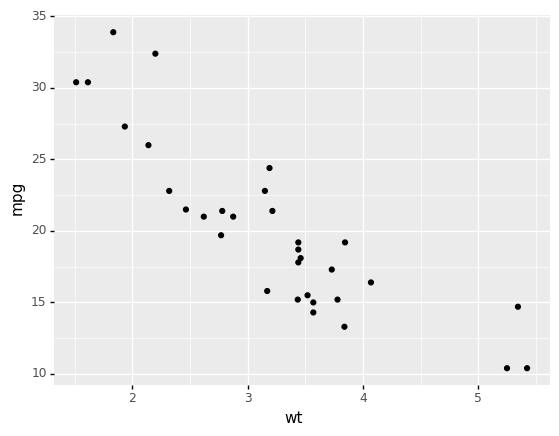

<ggplot: (124688830645)>

In [5]:
#Scatter plot

(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point())

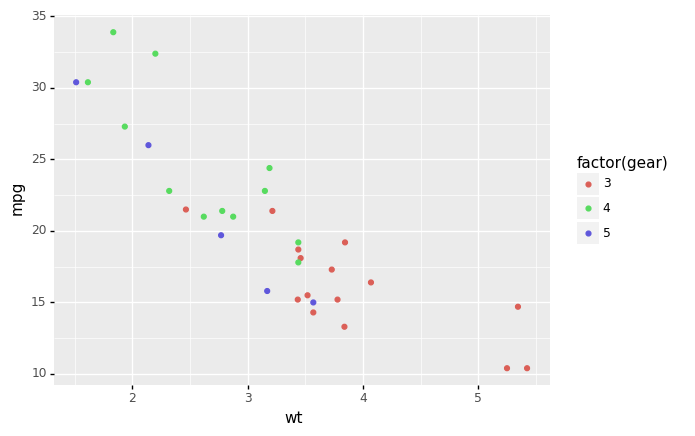

<ggplot: (124688952814)>

In [6]:
#Scatter plot colored according some variable

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point())

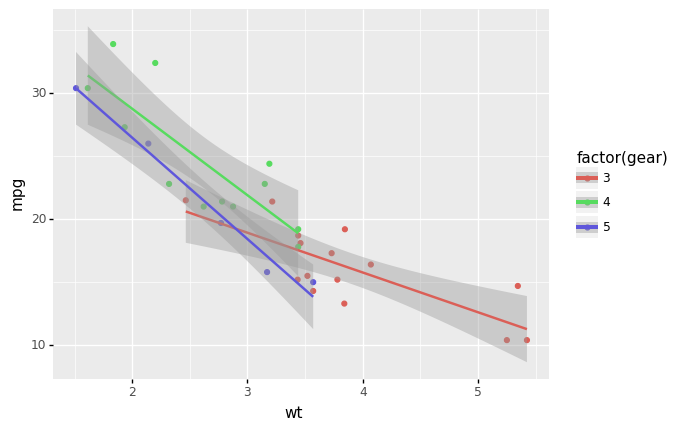

<ggplot: (124688807804)>

In [7]:
#Scatter plot colored according some variable and smoothed with a linear model with confidence intervals.

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm'))

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


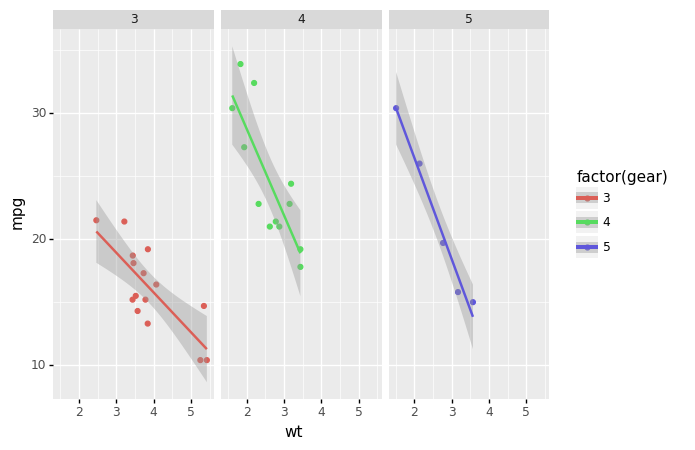

<ggplot: (124690122960)>

In [50]:
#Scatter plot colored according some variable, 
#smoothed with a linear model with confidence intervals and plotted on separate panels.

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 
 + facet_wrap('~gear'))

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


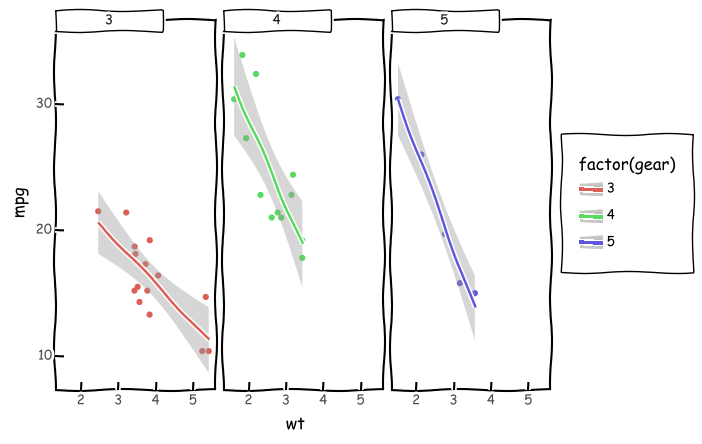

<ggplot: (124688926356)>

In [9]:
#Make it playful

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear')
 + theme_xkcd())

# 	Stage

In [10]:
%load_ext autoreload
%autoreload 2
%aimport plotnine

import pandas as pd
import numpy as np

from plotnine import *

%matplotlib inline

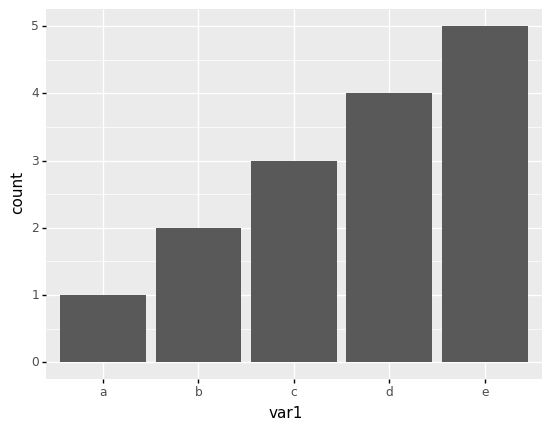

<ggplot: (124691830950)>

In [54]:
df = pd.DataFrame({
    'var1': list('abbcccddddeeeee'),
    'cat': list('RSRSRSRRRSRSSRS')
})

(ggplot(df, aes('var1'))
 + geom_bar()
)

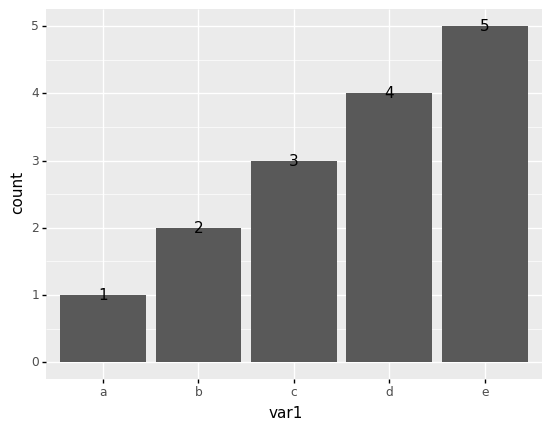

<ggplot: (124690110169)>

In [12]:
#Add the corresponding count on top of each bar.

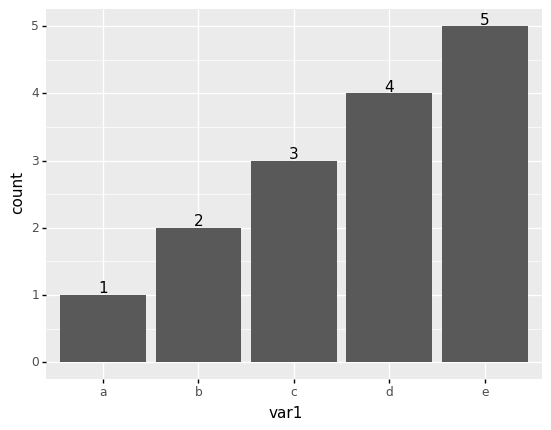

<ggplot: (124690131869)>

In [13]:
#Adjust the y position so that the counts do not overlap the bars.

(ggplot(df, aes('var1'))
 + geom_bar()
 + geom_text(aes(label=after_stat('count'), y=stage(after_stat='count', after_scale='y+.1')), stat='count')
)

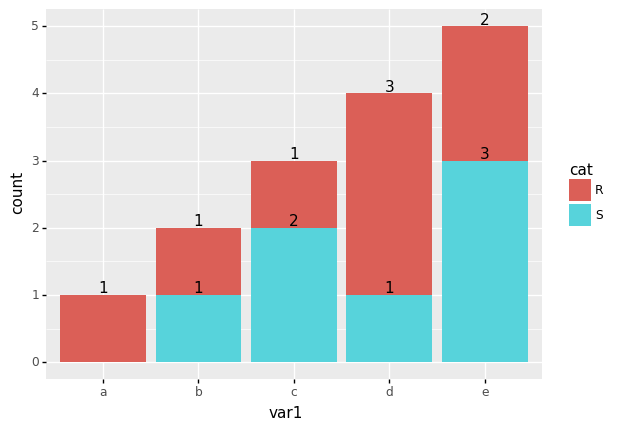

<ggplot: (124690000038)>

In [14]:
#Note that this will work even nicely for stacked bars where adjustig the position with nudge_y=0.1 would not.

(ggplot(df, aes('var1', fill='cat'))
 + geom_bar()
 + geom_text(aes(label=after_stat('count'), y=stage(after_stat='count', after_scale='y+.1')), stat='count', position='stack')
)

# Scale_x_Continuous

In [15]:
import numpy as np
import pandas as pd
from plotnine import *
from mizani.transforms import trans

##### Guitar Neck
Using a transformed x-axis to visualise guitar chords

The x-axis is transformed to resemble the narrowing width of frets on a 25.5 inch Strat. To do that we create custom transformation.

The key parts of any transform object are the transform and inverse functions.

In [16]:
class frets_trans(trans):
    """
    Frets Transformation
    """
    number_of_frets = 23               # Including fret 0
    domain = (0, number_of_frets-1)
    
    @staticmethod
    def transform(x):
        x = np.asarray(x)
        return 25.5 - (25.5 / (2 ** (x/12)))
    
    @staticmethod
    def inverse(x):
        x = np.asarray(x)
        return 12 * np.log2(25.5/(25.5-x))
    
    @classmethod
    def breaks_(cls, limits):
        # Fixed major breaks
        return cls.domain
    
    @classmethod
    def minor_breaks(cls, major, limits):
        # The major breaks as passed to this method are in transformed space.
        # The minor breaks are calculated in data space to reveal the 
        # non-linearity of the scale.
        _major = cls.inverse(major)
        minor = cls.transform(np.linspace(*_major, cls.number_of_frets))
        return minor

The above transform is different from most in that, breaks and minor breaks do not change. This is common of very specialized scales. It can also be a key requirement when creating graphics for demontration purposes.

Some chord Data

In [17]:
# Notes: the 0 fret is an open strum, all other frets are played half-way between fret bars.
# The strings are 1:low E, 2: A, 3: D, 4: G, 5: B, 6: E
c_chord = pd.DataFrame({
    'Fret':   [0, 2.5, 1.5, 0, 0.5, 0],
    'String': [1, 2, 3, 4, 5, 6]
})

# Sequence based on the number of notes in the chord
c_chord['Sequence'] = list(range(1, 1+len(c_chord['Fret'])))

# Standard markings for a Stratocaster
markings = pd.DataFrame({
    'Fret':   [2.5, 4.5, 6.5, 8.5, 11.5, 11.5, 14.5, 16.5, 18.5, 20.5],
    'String': [3.5, 3.5, 3.5, 3.5, 2, 5, 3.5, 3.5, 3.5, 3.5]
})

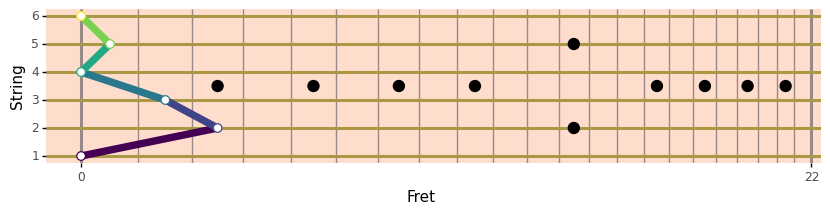

<ggplot: (124690309629)>

In [18]:
#Visualizing the chord

# Look and feel of the graphic
neck_color = '#FFDDCC'
fret_color = '#998888'
string_color = '#AA9944'

neck_theme = theme(
    figure_size=(10, 2),
    panel_background=element_rect(fill=neck_color),
    panel_grid_major_y=element_line(color=string_color, size=2.2),
    panel_grid_major_x=element_line(color=fret_color, size=2.2),
    panel_grid_minor_x=element_line(color=fret_color, size=1)
)

# Gallery Plot

(ggplot(c_chord, aes('Fret', 'String'))
 + geom_path(aes(color='Sequence'), size=3)
 + geom_point(aes(color='Sequence'), fill='#FFFFFF', size=3)
 + geom_point(data=markings, fill='#000000', size=4)
 + scale_x_continuous(trans=frets_trans)
 + scale_y_continuous(breaks=range(0, 7), minor_breaks=[])
 + guides(color=False)
 + neck_theme
)


# After_Scale

In [19]:
import pandas as pd
import numpy as np

from plotnine import *

%matplotlib inline

###### after_scale
The bars in geom_bar have two aesthetics that control the coloring; fill for the interior and color for the boundary/edge. Using after_scale we can create a matching combination of these two.

Start off with a mapping to the color.

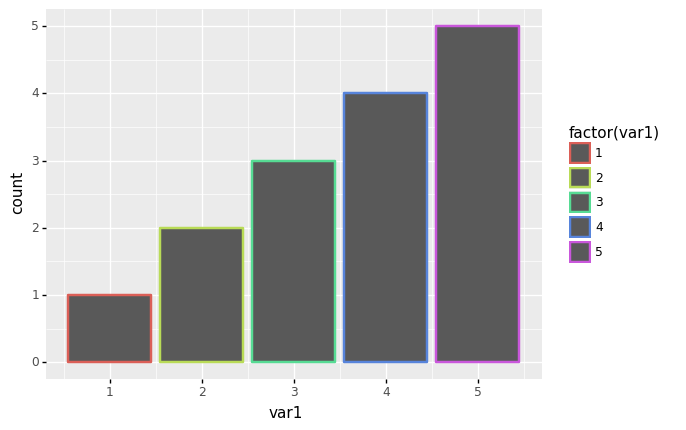

<ggplot: (124688289058)>

In [20]:
df = pd.DataFrame({
    'var1': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
})

(ggplot(df, aes('var1', color='factor(var1)'))
 + geom_bar(size=1)
)

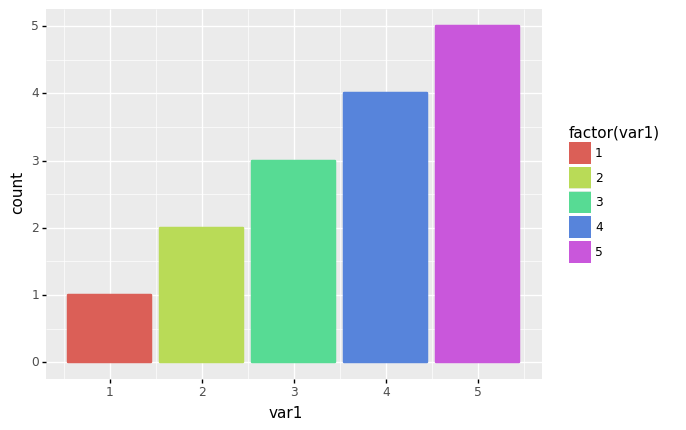

<ggplot: (124690360908)>

In [21]:
#We can match the color with the fill.

(ggplot(df, aes('var1', color='factor(var1)'))
 + geom_bar(aes(fill=after_scale('color')), size=1)
)

As after_scale takes an expression, for the fill aesthetic we can modify the color by adding to it an alpha channel i.e. '#AABBCC' to '#AABBCC66'.

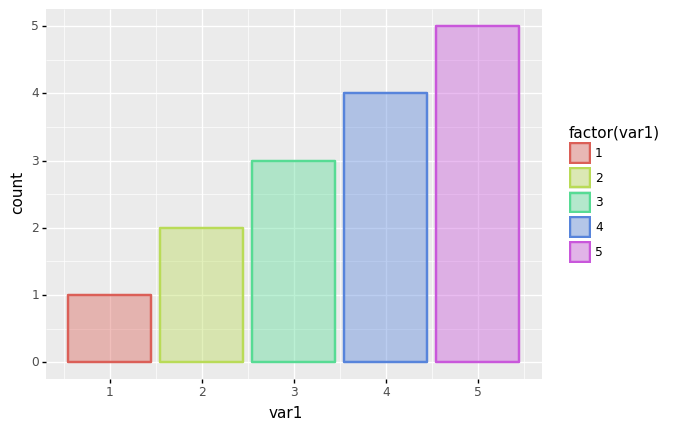

<ggplot: (124691526641)>

In [22]:
(ggplot(df, aes('var1', color='factor(var1)'))
 + geom_bar(aes(fill=after_scale('color + "66"')), size=1)
)

We rely on the fact that you can append a string to all elements of a pandas series

pd.Series(['#AABBCC', '#112233']) + '66' == pd.Series(['#AABBCC66', '#11223366'])
With a fitting theme.

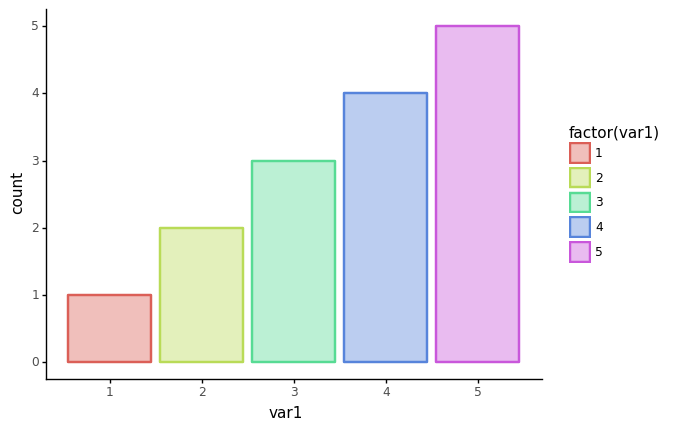

<ggplot: (124691917047)>

In [23]:
(ggplot(df, aes('var1', color='factor(var1)'))
 + geom_bar(aes(fill=after_scale('color + "66"')), size=1)
 + theme_classic()
)

# Facet_grid

In [24]:
import pandas as pd

from plotnine import *
from plotnine.data import *

%matplotlib inline

###### Facet grid
facet_grid() is used to form a grid of plots, where the rows and columns of the grid are set by the faceting variables. It is useful for visualising two discrete variables.

In [25]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


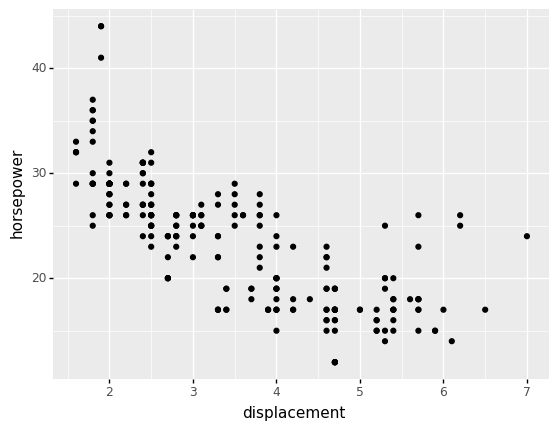

<ggplot: (124691915072)>

In [26]:
#Basic scatter plot:

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


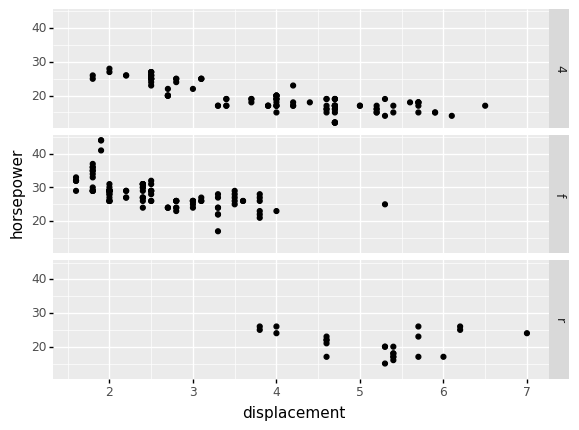

<ggplot: (124691746039)>

In [27]:
#Facet a discrete variable into rows:

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .')
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


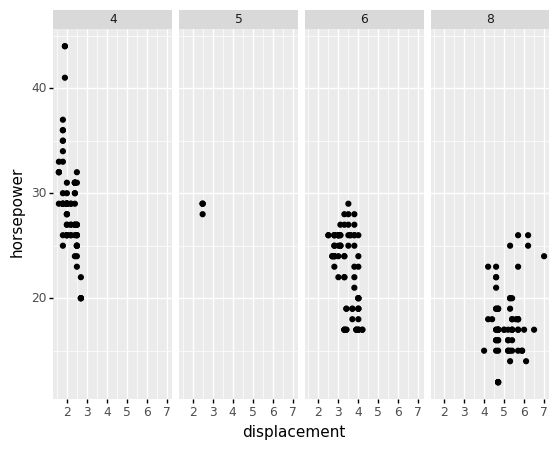

<ggplot: (124692175074)>

In [28]:
#Facet a discrete variable into columns:

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('. ~ cyl')
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


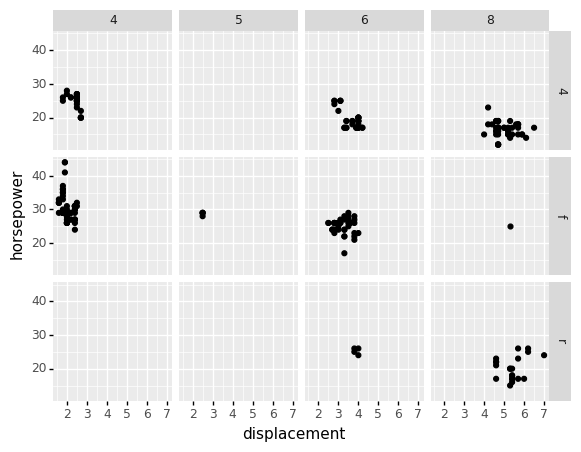

<ggplot: (124691712844)>

In [29]:
#Facet two discrete variables into rows and columns:

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ cyl')
    + labs(x='displacement', y='horsepower')
)

In [30]:
#To change the plot order of the rows or columns in the facet grid, reorder the levels of the faceting variable in the data.

# re-order categories
mpg['drv'] = mpg['drv'].cat.reorder_categories(['f', 'r','4'])

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


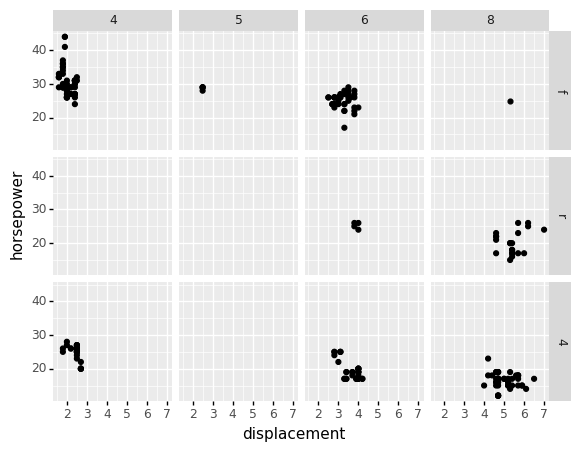

<ggplot: (124689931783)>

In [31]:
# facet plot with reorded drv category
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ cyl')
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


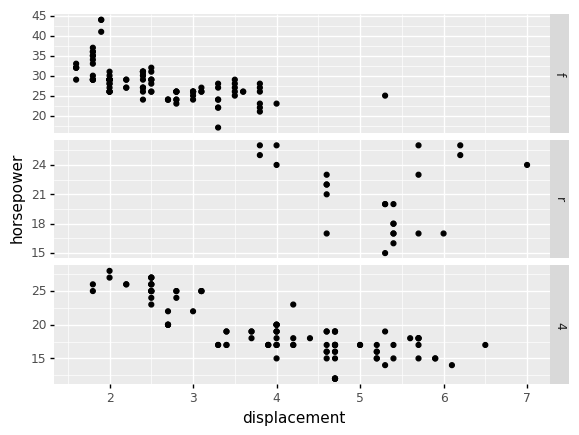

<ggplot: (124691549576)>

In [32]:
#You can choose if the scale of x- and y-axes are fixed or variable by using the scales argument within the facet_grid() command:

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .', scales = 'free')
    + labs(x='displacement', y='horsepower')
)

You can add additional information to your facet labels, by using the labeller argument within the facet_grid() command. Below we use labeller = 'label_both' to include the column name in the facet label.

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


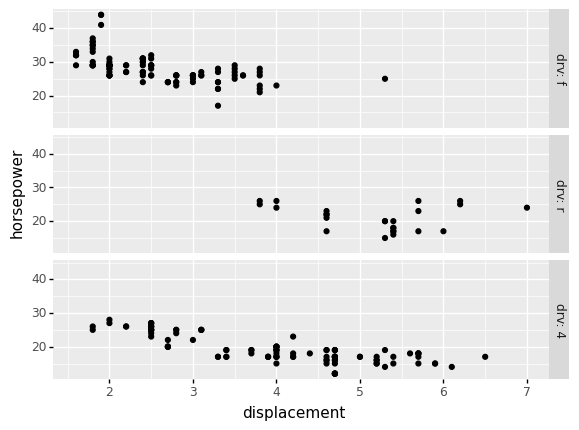

<ggplot: (124688905795)>

In [33]:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv ~ .', labeller = 'label_both')
    + labs(x='displacement', y='horsepower')
)

In [34]:
#You can add two discrete variables to a facet:

# add additional column for plotting exercise
mpg["transmission"] = mpg['trans'].map(lambda x: "auto" if "auto" in x else "man" if "man" in x else "")
# inspect new column transmission which identifies cars as having an automatic or manual transmission
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,man
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,man
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


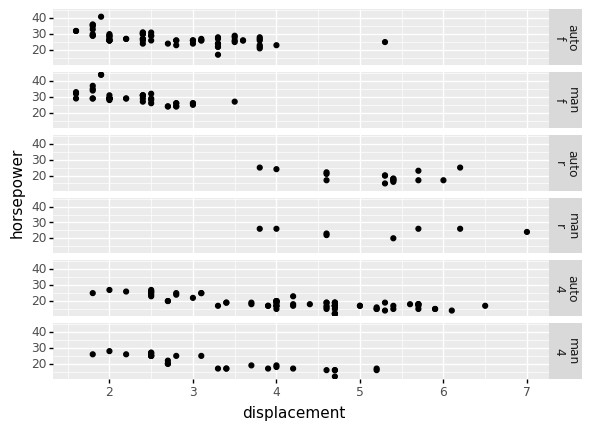

<ggplot: (124691509884)>

In [35]:
# facet plot with two variables on one facet
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_grid('drv + transmission ~ .') # use + to add additional faceting variables
    + labs(x='displacement', y='horsepower')
)

Facet labels can be rotated to make them easier to read using strip_text_y = element_text(angle = 0) for row labels within the theme() command (use strip_text_x = element_text(angle = 0) for column labels).

If the labels do not fit in the strip, adjust the width of the strip using strip_background_y for rows (use strip_background_x for columns). You may also need to adjust the text position so it fits in the strip: adjust the horizontal text position in the strip by specifying ha in element_text()(specify va in element_text() to adjust the vertical text position).

You can also change the colour of the strip by specifying color in element_text() .

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


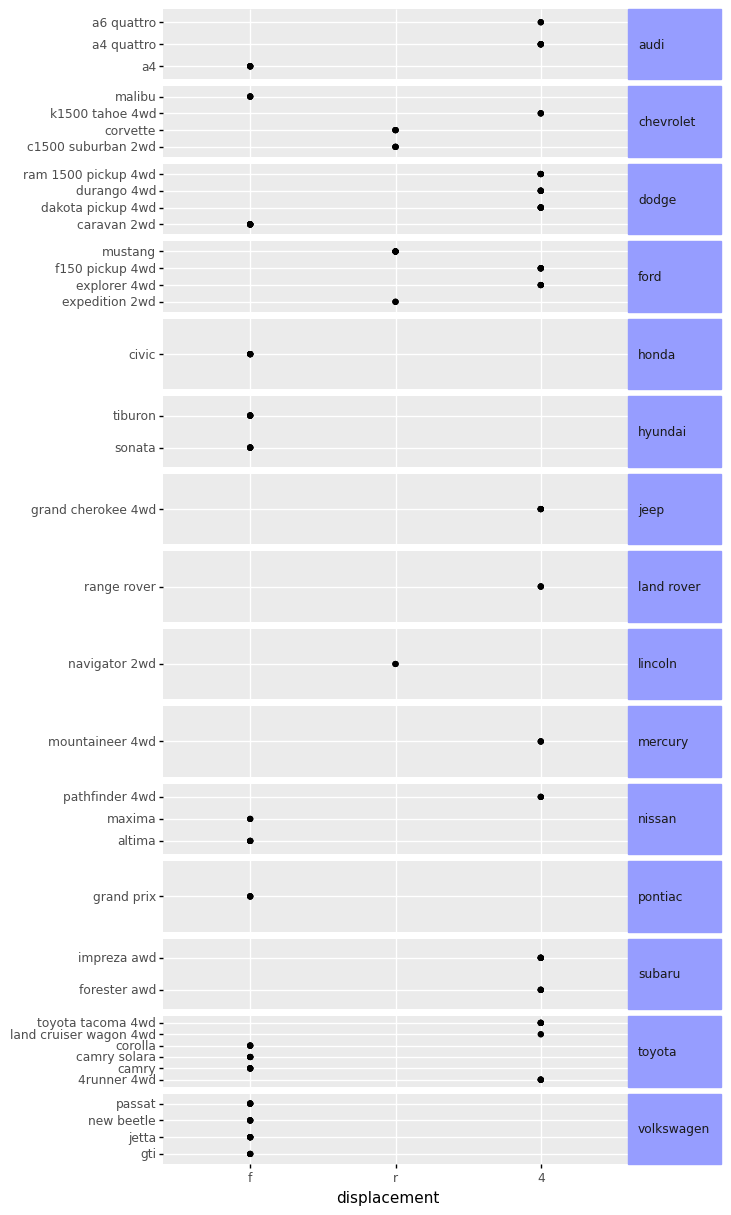

<ggplot: (124691629556)>

In [36]:
(
    ggplot(mpg, aes(x='drv', y='model'))
    + geom_point()
    + facet_grid('manufacturer ~ .', scales = 'free')
    + theme(strip_text_y = element_text(angle = 0,              # change facet text angle
                                        ha = 'left'             # change text alignment
                                       ),
            strip_background_y = element_text(color = '#969dff' # change background colour of facet background
                                              , width = 0.2     # adjust width of facet background to fit facet text
                                             ),
            figure_size=(6, 15)                                 # adjust width & height of figure to fit y-axis
           )
    + labs(x='displacement', y='')
)

# Facet_Wrap

In [37]:
import pandas as pd

from plotnine import *
from plotnine.data import *

%matplotlib inline

###### Facet wrap
facet_wrap() creates a collection of plots (facets), where each plot is differentiated by the faceting variable. These plots are wrapped into a certain number of columns or rows as specified by the user.

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,man
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,man
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


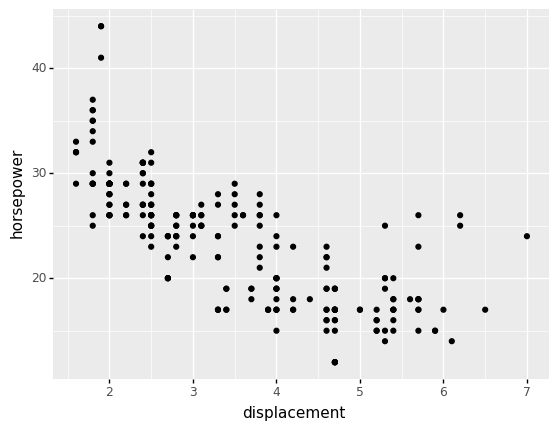

<ggplot: (124689968119)>

In [39]:
#Basic scatter plot:
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


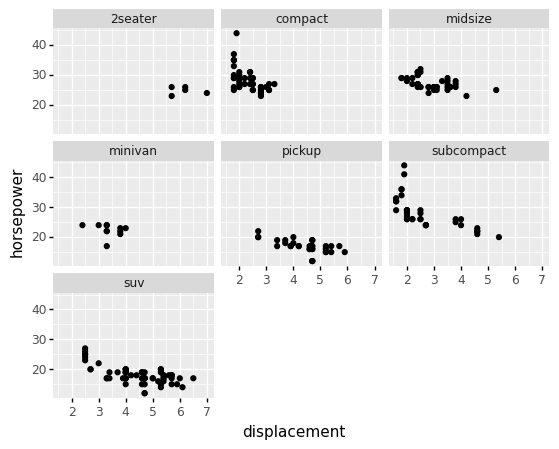

<ggplot: (124690124198)>

In [40]:
#Facet a discrete variable using facet_wrap():

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class')
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


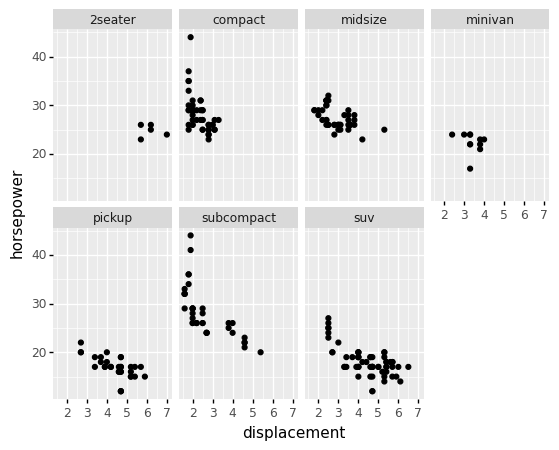

<ggplot: (124689981380)>

In [41]:
#Control the number of rows and columns with the options nrow and ncol:

# Selecting the number of columns to display
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class',
                 ncol = 4 # change the number of columns
                )
    + labs(x='displacement', y='horsepower')
)

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


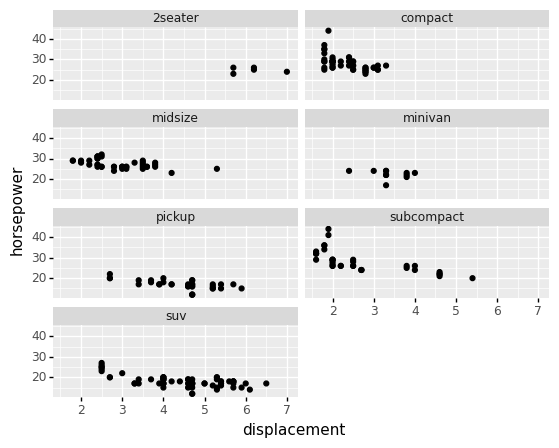

<ggplot: (124692312697)>

In [42]:
# Selecting the number of rows to display

(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class', 
                 nrow = 4 # change the number of columns
                )
    + labs(x='displacement', y='horsepower')
)

To change the plot order of the facets, reorder the levels of the faceting variable in the data.

In [43]:
# re-order categories
mpg['class'] = mpg['class'].cat.reorder_categories(['pickup', 'suv','minivan','midsize','compact','subcompact','2seater'])

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


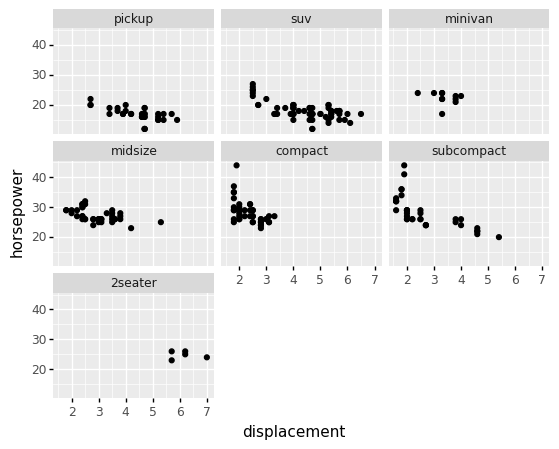

<ggplot: (124690174742)>

In [44]:
# facet plot with reorded drv category
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class')
    + labs(x='displacement', y='horsepower')
)

Ordinarily the facets are arranged horizontally (left-to-right from top to bottom). However if you would prefer a vertical layout (facets are arranged top-to-bottom, from left to right) use the dir option:

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


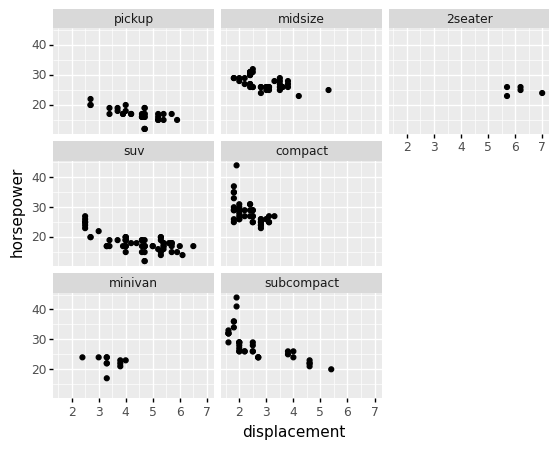

<ggplot: (124691680187)>

In [45]:
# Facet plot with vertical layout
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class'
                , dir = 'v' # change to a vertical layout
                )
    + labs(x='displacement', y='horsepower')
)

You can choose if the scale of x- and y-axes are fixed or variable. Set the scales argument to free-y, free_x or free for a free scales on the y-axis, x-axis or both axes respectively. You may need to add spacing between the facets to ensure axis ticks and values are easy to read.

A fixed scale is the default and does not need to be specified.

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


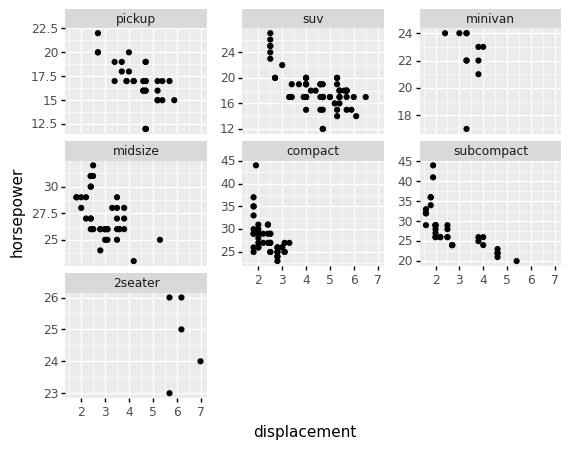

<ggplot: (124690059514)>

In [46]:
# facet plot with free scales
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class'
                , scales = 'free_y'           # set scales so y-scale varies with the data
                )
    + theme(subplots_adjust={'wspace': 0.25}) # add spaceing between facets to make y-axis ticks visible
    + labs(x='displacement', y='horsepower')
)

You can add additional information to your facet labels, by using the labeller argument within the facet_wrap() command. Below we use labeller = 'label_both' to include the column name in the facet label.

C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


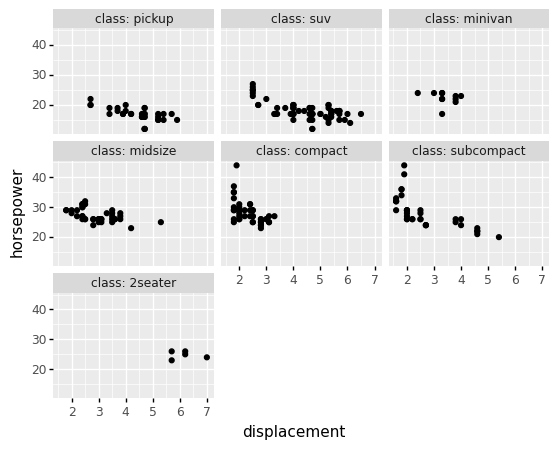

<ggplot: (124689651176)>

In [47]:
# facet plot with labeller
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('class', labeller = 'label_both')
    + labs(x='displacement', y='horsepower')
)

You can add two discrete variables to a facet:

In [48]:
# add additional column for plotting exercise
mpg["transmission"] = mpg['trans'].map(lambda x: "auto" if "auto" in x else "man" if "man" in x else "")

# inspect new column transmission which identifies cars as having an automatic or manual transmission
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,man
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,man
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


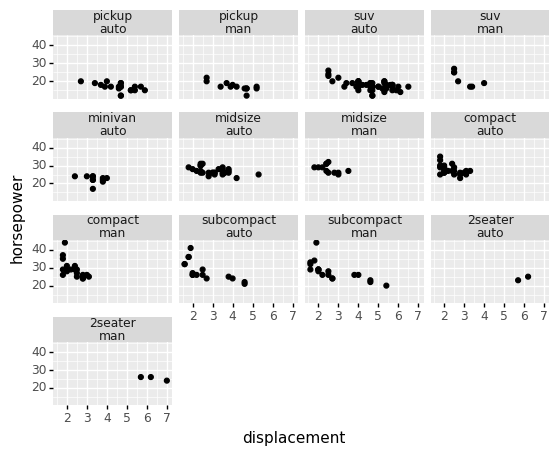

<ggplot: (124689991325)>

In [49]:
# facet plot with two variables on one facet
(
    ggplot(mpg, aes(x='displ', y='hwy')) 
    + geom_point()
    + facet_wrap('~ class + transmission') # use ~ + to add additional faceting variables
    + labs(x='displacement', y='horsepower')
)